In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Dhaka Rent.csv", sep=";")
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
x = df['area']
y = df['rent']

In [5]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

### Least Square Method 

In [6]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [7]:
mean_x

2289.0

In [8]:
mean_y

37269.166666666664

In [9]:
dev_x = x - mean_x
dev_x.head()

0   -289.0
1   -189.0
2    211.0
3    -39.0
4    711.0
Name: area, dtype: float64

In [10]:
dev_y = y - mean_y
dev_y.head()

0    -5769.166667
1    -2269.166667
2     3780.833333
3    -1169.166667
4    14830.833333
Name: rent, dtype: float64

### Slope

In [11]:
m = np.sum(dev_x*dev_y) / np.sum(dev_x**2)
m

21.292661473611954

### Intercept

In [12]:
c = mean_y - m * mean_x
c

-11469.7354464311

In [13]:
print (f"Slope m : {m}")
print (f"Intercept c : {c}")

Slope m : 21.292661473611954
Intercept c : -11469.7354464311


In [15]:
new_x = float(input("Enter any value of area: "))
pred1 = print("predicted rent is:",m * new_x + c)
pred1

Enter any value of area:  2000


predicted rent is: 31115.58750079281


In [16]:
Residual = y[0] - 31115.58750079281
Residual

384.4124992071884

### Scikit-learn

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()
reg.fit(df[['area']], y)

LinearRegression()

In [19]:
reg.coef_

array([21.29266147])

In [20]:
reg.intercept_

-11469.735446431114

In [23]:
reg.predict([[2000]])

array([31115.58750079])

### Formal work

Text(0.5, 1.0, 'area-rent visualization')

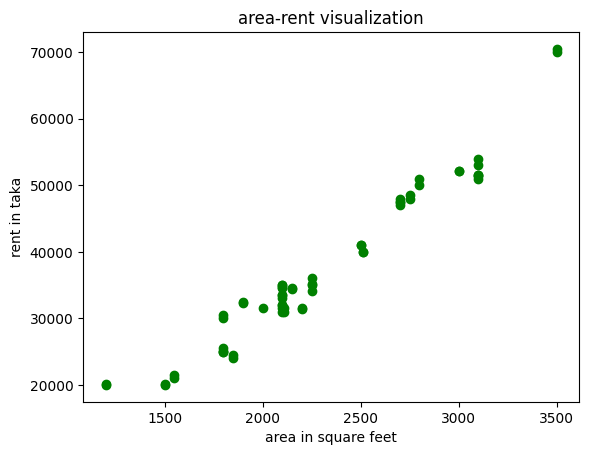

In [28]:
plt.scatter(x,y, color='green')
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')

### Data split

In [29]:
df.head(5)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [36]:
from sklearn.model_selection import train_test_split

In [68]:
x = df.drop('rent', axis=1)  ##2D
y = df[['rent']]

In [69]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [70]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .30)

In [72]:
xtrain.head()

,area
47,1550
43,2510
57,1800
48,1800
42,2100


In [73]:
ytrain.head()

,rent
47,21500
43,40000
57,25100
48,25500
42,34700


In [74]:
xtest.head()

,area
11,2100
52,3500
51,2100
55,3100
58,2200


In [75]:
ytest.head()

,rent
11,32000
52,70500
51,33000
55,54000
58,31560


In [76]:
xtest.shape

(18, 1)

In [77]:
xtrain.shape

(42, 1)

In [78]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [79]:
reg.predict(xtest)

array([[33362.83999952],
       [62960.02580472],
       [33362.83999952],
       [54503.68700323],
       [35476.92469989],
       [35476.92469989],
       [29134.67059877],
       [54503.68700323],
       [48161.43290212],
       [27020.5858984 ],
       [27020.5858984 ],
       [33574.24846955],
       [54503.68700323],
       [20678.33179729],
       [42030.58727104],
       [21735.37414747],
       [33362.83999952],
       [20678.33179729]])

In [80]:
ytest.head()

,rent
11,32000
52,70500
51,33000
55,54000
58,31560


In [81]:
ytest['predicted_y'] = reg.predict(xtest)

In [82]:
ytest.head()

,rent,predicted_y
11,32000,33362.840000
52,70500,62960.025805
51,33000,33362.840000
55,54000,54503.687003
58,31560,35476.924700


In [83]:
len(ytest)

18

In [94]:
ytest.drop('predicted_y', axis = 1, inplace = True)

In [95]:
ytest.head()

,rent
11,32000
52,70500
51,33000
55,54000
58,31560


In [96]:
#trainnig score
reg.score(xtrain, ytrain)

0.9515709359043577

In [97]:
#testing score
reg.score(xtest, ytest)

0.9477026953824755

### MSE & MAE

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [100]:
mse = mean_squared_error(ytest, reg.predict(xtest))
mse

8986221.592290694

In [101]:
mae = mean_absolute_error(ytest, reg.predict(xtest))
mae

2431.2779326800114

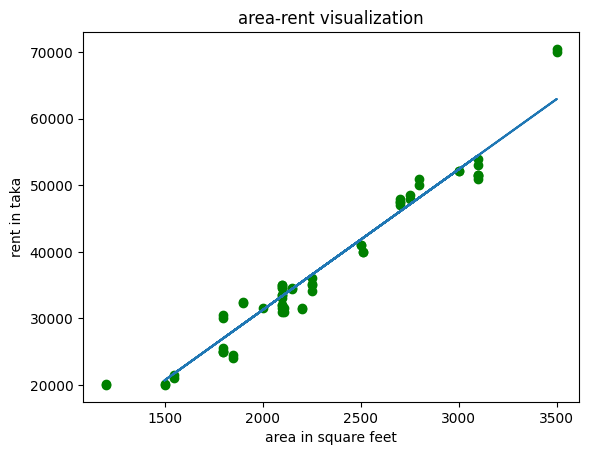

In [102]:
plt.scatter(x,y, color='green')
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest, reg.predict(xtest))